# Gaussian Mixture Model (GMM)

GMM can be used for anomaly detection, density estimation and clustering. It is a probabilistic model that uses several Gaussian distributions (i.e. bell curves) and assumes instances falls within a given distribution. 

It assumes that the clusters have been formed by the Gaussian Distribution, hence the need of a weight vector, i.e. the instance have been formed from the distribution using the same weight vector applied across the entire dataset.

You can use Sci-kit Learn's sklearn.mixture.GaussianMixture, where you are required to specify the number $k$ Gaussian distributions (n_components).

The dataset <b>X</b> is picked randomly among $k$ clusters. The probability of a cluster is defined by using $\phi^{(j)}$, the cluster's weight, where $j$ is the selected cluster.
The location of the instance is sampled randomly in the Gaussian Distribution with <b>mean</b>, $\mu^{(j)}$, and the <b>Covariance Matrix </b>, $\Sigma^{(j)}$. The covariance matrix contains the dataset's variances (along a given axis) diagonally (i.e. the 'spread' in the data of a given feature). The values of the covariance are discussed within the notebook. 

The weight vector, $\phi$ - $\phi^{(1)}$ to $\phi^{(k)}$ - is applied to each random variable from $z^1$ to $z^m$. A categorical distribution defines $z^i$, which in turn uses the associated mean, $\phi^{(i)}$, and Covariance Matrix, $\Sigma^{(i)}$, to find the probability that $x^i$ belongs to that cluster.

<b>X</b> - are known instances and are called <i>observed variables</i>.

<b>$z^i$</b> - are unknown random variables and are called <i>latent variables</i>.


https://www.youtube.com/watch?v=DODphRRL79c

In [1]:
#Load blobs

from sklearn.datasets import make_blobs
import numpy as np

#Create 2 blobs
X1, y1 = make_blobs(random_state = 42, n_samples=1000, centers= ((2, -2), (0, 0)))
X1 = X1.dot(np.array([[0.2, 0.9], [0.9, 0.2]]))
#create a small plot
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
#merge both these clusters together, row wise.
X = np.r_[X1, X2]
y = np.r_[y1, y2]
X
y

array([1, 1, 0, ..., 0, 0, 0])

(-4.184034449976794, 7.081764977563407, -2.694533476532757, 5.227091480538079)

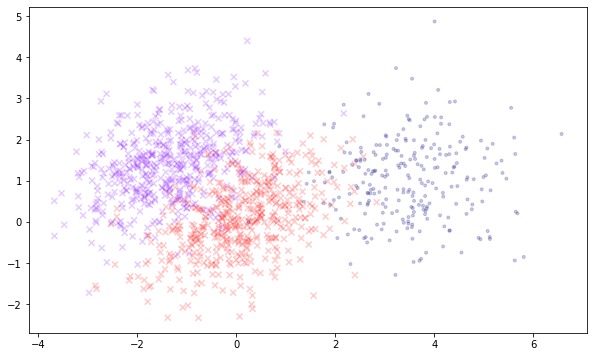

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 6))
plt.scatter(X1[:,0], X1[:,1], alpha=0.2, c=y1, marker='x', cmap='rainbow')
plt.scatter(X2[:,0], X2[:,1], alpha=0.2, c=y2, marker='.', cmap= 'jet')
plt.axis('on')

In [3]:
from sklearn.mixture import GaussianMixture

#n_init is the number of initializations to perform, GMM may converge to poor solutions!
#So make sure you set n_init, the default is 1.
#n_components - number of clusters
gm = GaussianMixture(n_components= 3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [4]:
gm.weights_ #phi, the weights vector, for the k clusters

array([0.39462799, 0.21369485, 0.39167716])

In [5]:
gm.means_ #mu, the means matrix, i.e. the centroid, pretty close to the actual values

array([[ 0.01448239,  0.06790076],
       [ 3.37557715,  1.00774782],
       [-1.38302219,  1.42356081]])

In [6]:
gm.covariances_ #Sigma, the covariance matrix

array([[[0.87132298, 0.37563997],
        [0.37563997, 0.79336113]],

       [[1.15999973, 0.05643165],
        [0.05643165, 0.96462409]],

       [[0.80094821, 0.31359194],
        [0.31359194, 0.7655363 ]]])

###### Weights Matrix - The values within the Vector shows the weights vectors applied to $z^k$.
###### Mean Matrix - The values within the Matrix shows the centroid or the mean of the clusters (i.e. cluster centres).
###### Covariance Matrix - The values within the Matrix shows the orientation, size and shape of the clusters.
 
 
#### The GaussianMixture class relies on the <u> Expectation Maximization (EM) algorithm</u>
The EM is very similiar to the kmeans algorithm. It first assigns the cluster parameters randomly, then repeats the following until convergence:
1. Assigns instances to clusters; called the <b>'Expectation step'</b>, using soft cluster assignments rather than hard cluster assignment unlike Kmeans (i.e. keep them off the road)  
2. Updates the clustering by using the weights and probabilities that an instance belongs to a cluster; called the <b>'Maxization step'</b>. The probabilities are called <i>responsibilities</i> of the clusters for the instances. 

In [7]:
gm.converged_ #has the GMM converged

True

In [8]:
gm.n_init #number of initializations

10

In [9]:
gm.n_iter_#number of iterations took to converge

4

In [10]:
# Now that you have the Weight vector, Mu mean matrix and Covariance Matrix - orientation, shape, size and relative weights
# You can find the cluster for new instances using Hard and Soft clustering.


#Hard clustering using .predict() method
print('Hard Clustering')
print(gm.predict(X))

#Soft clustering using .predict_proba() method
print('Soft Clustering')
print(gm.predict_proba(X))

Hard Clustering
[0 2 2 ... 1 1 1]
Soft Clustering
[[9.31806874e-01 3.32499377e-02 3.49431887e-02]
 [4.36135218e-01 3.69118086e-03 5.60173601e-01]
 [4.36798409e-01 1.86177519e-05 5.63182973e-01]
 ...
 [1.54342155e-02 9.84565127e-01 6.57095167e-07]
 [3.01323644e-05 9.99969868e-01 4.50638678e-11]
 [5.47045187e-04 9.99452954e-01 3.69555421e-10]]


In [11]:
# you can gather new instances by using .sample()

X_new, y_new = gm.sample(10)
X_new

array([[-1.20235141,  0.35357005],
       [ 0.31149875,  0.12311633],
       [-1.62221075, -0.71098165],
       [ 3.73025097,  1.65017789],
       [ 3.97831356,  0.69948787],
       [ 3.60497263, -0.86092564],
       [ 5.32354469,  0.96270601],
       [ 4.35678515,  1.58781045],
       [-0.02727097,  1.37388381],
       [-2.39261513,  0.25657823]])

In [12]:
y_new

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [13]:
#you find the densities of a given instance by using the score_samples()
#this outputs a negative number - don't forget Sci-kit learn's rule = Greater is better. 
#Finding the exponential of these scores gives the PDF not the probailities. To find the probability you will need to 
#integrate over a space. 

gm.score_samples(X_new)

array([-2.9476027 , -2.50956436, -3.84390366, -3.6920171 , -3.65153177,
       -5.29537291, -5.08161389, -3.99806527, -3.1577914 , -3.51127416])

Let me prove that integrating over all the instances gives 1. 

In [14]:
import numpy as np

resolution = 100 #the integral batch 
grid = np.arange(-10, 10, 1/resolution) #create vector of values

xx, yy = np.meshgrid(grid, grid) #xx is the columns from -10 to 10, and yy is the rows from -10 to 10 
# xx.shape # - 2000 x 2000 matrix

#xx.ravel().shape - 2,000 x 2,000 = 4,000,000 column vector
#xx.ravel() flattens the array, same as .reshape(-1, 1)

#np.vstack, stacks the matrix one top of another
X_full = np.vstack([xx.ravel(), yy.ravel()]).T #.T transposes the matrix so we have rows
# X_full.shape
X_full

array([[-10.  , -10.  ],
       [ -9.99, -10.  ],
       [ -9.98, -10.  ],
       ...,
       [  9.97,   9.99],
       [  9.98,   9.99],
       [  9.99,   9.99]])

In [15]:
pdf = np.exp(gm.score_samples(X_full)) #exp(score_Samples)
pdf.shape

(4000000,)

In [16]:
pdf_probas = pdf * (1/resolution)**2
pdf_probas

array([3.64418631e-42, 3.93036483e-42, 4.23840576e-42, ...,
       2.69891496e-31, 2.56084870e-31, 2.42963533e-31])

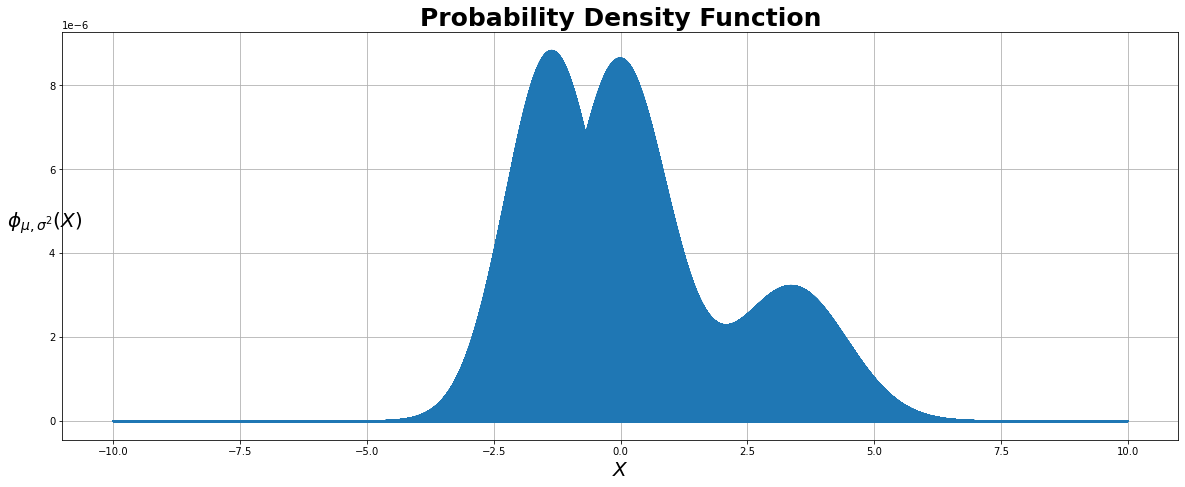

In [17]:
plt.figure(figsize=(20, 7.5))
plt.plot(X_full[:, 0], pdf_probas)
plt.title('Probability Density Function',fontweight='bold', fontsize= 25)
plt.xlabel('$X$', fontsize= 20)
plt.ylabel('$\phi_{\mu, \sigma^2}(X)$', fontsize= 20, rotation=0)
plt.grid()

# Great! This is the PDF graph of the 3 clusters, you can clearly see where the GMM has calculated the centroid to be, $\mu$, and the Covariance (i.e. Standard Deviation), $\Sigma$. Integrate under the graph is equal to one.
Note the y axis size. 

### In reality, the Gaussian Mixture Model may struggle with higher dimensional data and identify the number of correct clusters. The Expectation Maximization (EM) algorithm may struggle to converge to the optimal solution, that is why it is important you check convergence with the .converged_ attribute. 

#### When the data is higher dimensional, you may want to reduce the difficulty by limiting parameters the number of parameters that the algorithm has to learn, i.e. Covariance matrix, limit the range of shapes, orientations. By setting covariance_type to the following:
- 'spherical' - all clusters must be spherical with different diameters
- 'diag' - all clusters take ellipsoidal shapes with different sizes but the matrix must only be diagonal. 
- 'tied' - all clusers take the same shape, size and oreintation - i.e. the same covariance matrix
- 'full' - default value, clusters can take any shape, size and orientation

In [18]:
import matplotlib.cm as cm

def plot_centroids(centroids, weights):
    centroids_centres = centroids[weights > weights.max()/10]
    plt.scatter(centroids_centres[:, 0], centroids_centres[:, 1], marker= 'o', s=150, color= 'y', zorder= 11, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker= 'x', s=100, color= 'r', zorder=11, linewidths=50)

def plot_gaussian_mixture(cluster_model, X, resolution=1000):
    minimum= X.min(axis=0) #minimum value of X
    maximum = X.max(axis=0) #maximum value of X
    
    #create a meshgrid of across the data to obtain the decision boundary - uncomment below to see result
    XX, yy = np.meshgrid(np.linspace(minimum[0], maximum[0], resolution), np.linspace(minimum[1], maximum[1], resolution))
    
    #samples_score gives negative values to make this positive
    #np.c_ combines XX, yy by columns, giving 2 columns with XX, YY values
    Z = -cluster_model.score_samples(np.c_[XX.ravel(), yy.ravel()])
    
    #reshape to the same size as XX
    Z = Z.reshape(XX.shape)
    
    plt.contourf(XX, yy, Z, cmap='Blues')
    
    plt.contourf(XX, yy, Z, cmap='Blues')
    
    #the 'height' of the predict
    Z =cluster_model.predict(np.c_[XX.ravel(), yy.ravel()])
    Z =Z.reshape(XX.shape)
    
    #plot decision boundary lines
    plt.contour(XX, yy, Z, linewidths=6, colors= 'r', linestyles= 'dashed')
#     plt.contour(XX, yy, Z, linewidths=6, colours= 'g', linestyles= 'dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k*', markersize=2)
    
    #plot centroids
    plot_centroids(cluster_model.means_, cluster_model.weights_)
    
    plt.title('GMM with decision boundary, convariance type = ' + cluster_model.covariance_type,
              fontweight='bold', fontsize= 15)
    plt.xlabel('$X_1$', fontsize= 20)
    plt.ylabel('$X_2$', fontsize= 20, rotation=0)
    ax= plt.gca()

In [19]:
# X_full.max(axis=0)

In [20]:
# np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[0]#.ravel()

In [21]:
# np.c_[np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[0].ravel(), np.meshgrid(np.linspace(-1,1,11), np.linspace(-1, 1, 11))[1].ravel()]

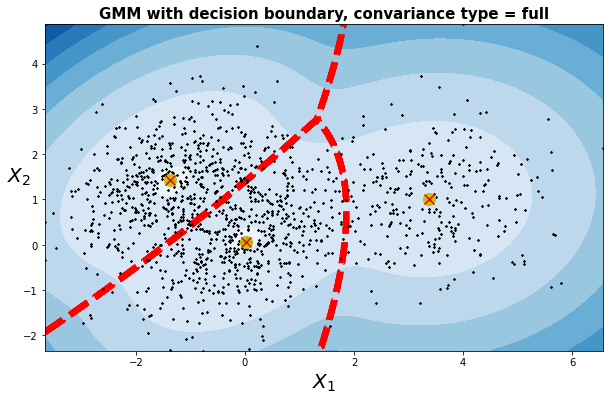

In [22]:
plt.figure(figsize= (10, 6))
plot_gaussian_mixture(gm, X)

In [23]:
# gm.means_[gm.weights_ > gm.weights_.max()/10][:, 1]

## Now lets use the function to see what happens when we plot for different covariance types. 
Spherical, diag, tied, full

In [24]:
from sklearn.mixture import GaussianMixture

gm_spherical = GaussianMixture(random_state=42, covariance_type='spherical', n_init=10, n_components=3)
gm_diag = GaussianMixture(random_state=42, covariance_type='diag', n_init=10, n_components=3)
gm_tied = GaussianMixture(random_state=42, covariance_type='tied', n_init=10, n_components=3)
gm_full = GaussianMixture(random_state=42, covariance_type='full', n_init=10, n_components=3)

gm_spherical.fit(X)
gm_diag.fit(X)
gm_tied.fit(X)
gm_full.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

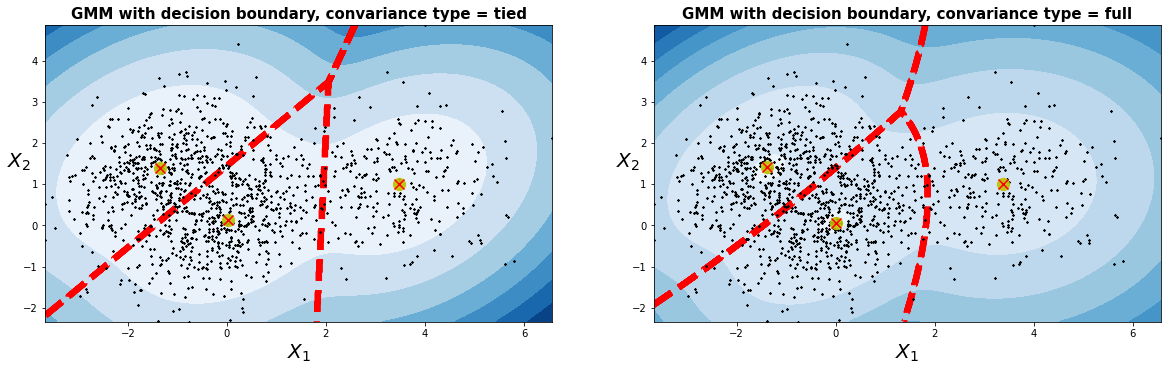

In [25]:
plt.figure(figsize= (20, 12))

plt.subplot(221)
plot_gaussian_mixture(gm_tied, X)

plt.subplot(222)
plot_gaussian_mixture(gm_full, X)

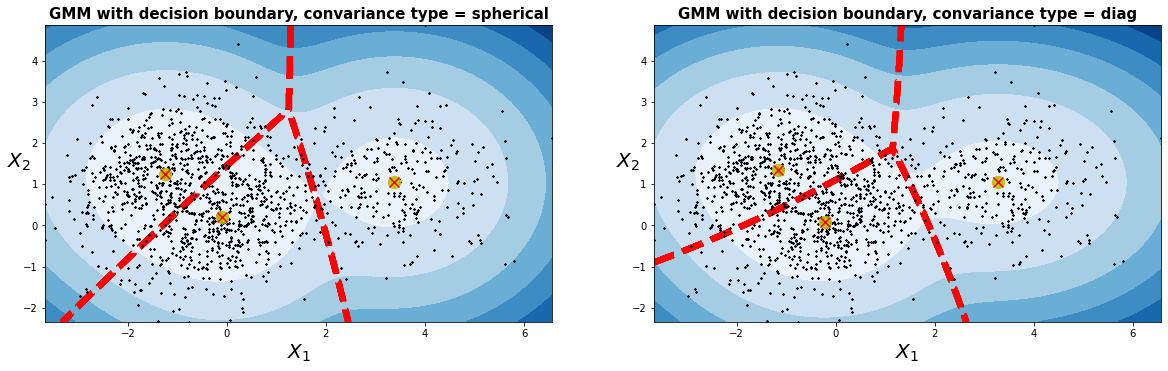

In [26]:
plt.figure(figsize= (20, 12))

plt.subplot(221)
plot_gaussian_mixture(gm_spherical, X)

plt.subplot(222)
plot_gaussian_mixture(gm_diag, X)

### Although, it does not look like it, changing the covariance type changes the decision boundary dramtically. 

The GMM computationally complexity depends on a number of clusters (n_components), covariance matrix (i.e. type), number of instances and number of dimensions. GMM does not scale well with large numbers of features. 

# Anomaly Detection Using Gaussian Mixtures
Also called outlier detection. 

GMM can be used to detect instances that deviate from the norm (i.e. detects anomalies and outliers). This can be useful for fraud detection and detecting defective equipment in a production line. More importantly, it can help remove anomalies before training another model, this will help improve the model's score.

To detect anomalies in GMM you need to <b>set the density threshold</b>.
For Example:
In a production line the known defective rate is 4%. So you should set that threshold to that value.
If the reported false positives (i.e. good products reported as defective) then you should decrease the value.
If the reported false negatives (i.e. bad products slip through the production line) then you should increase the value.

<b>There is a precision/recall trade off.</b>

In [27]:
#return log probabilities of each value of X

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) #4th percentile
density_threshold

-5.473223387299634

In [28]:
# values less than the 4th percentiles are anomalies
anomalies = X[densities < density_threshold]
anomalies

array([[ 0.59195634,  3.6057413 ],
       [ 2.39683884, -1.29455709],
       [ 1.56196717, -1.79127663],
       [-2.84364324, -1.54919521],
       [-3.66852814, -0.3429737 ],
       [-0.83203145,  3.72786751],
       [ 0.22339358,  4.39490771],
       [-0.79455054,  3.62702102],
       [ 0.06944133, -2.297334  ],
       [-0.974437  ,  3.6848641 ],
       [-2.97020235, -1.72201813],
       [-2.61153463, -0.9838591 ],
       [-1.38134412, -2.32858533],
       [-3.47196066, -0.0727791 ],
       [ 0.3107928 , -2.00500715],
       [-2.73027234,  2.92931248],
       [-3.67195266,  0.50814845],
       [ 0.3281456 , -1.78591826],
       [-2.81901936, -1.62737759],
       [-1.78635028, -1.9396529 ],
       [ 0.33010369, -2.11166504],
       [-1.37239541,  3.56806543],
       [-0.7634613 , -2.33445961],
       [-2.61760696,  3.10973967],
       [ 4.89359669, -0.38756493],
       [ 4.93207567, -0.42157602],
       [ 2.17056917,  2.84574489],
       [ 5.80546094, -0.85297906],
       [ 5.68060531,

# 4th Percentile

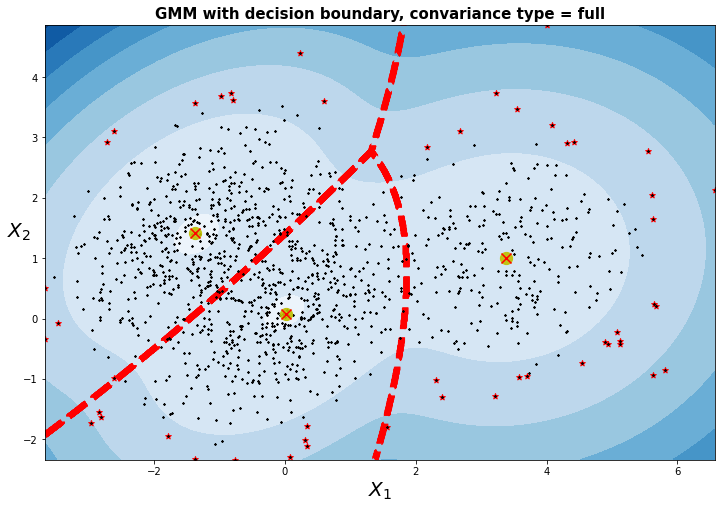

In [29]:
plt.figure(figsize=(12, 8))

plot_gaussian_mixture(gm, X)

#plot anomalies 
plt.scatter(anomalies[:,0], anomalies[:,1], color='r', marker='*')


# 10th Percentile

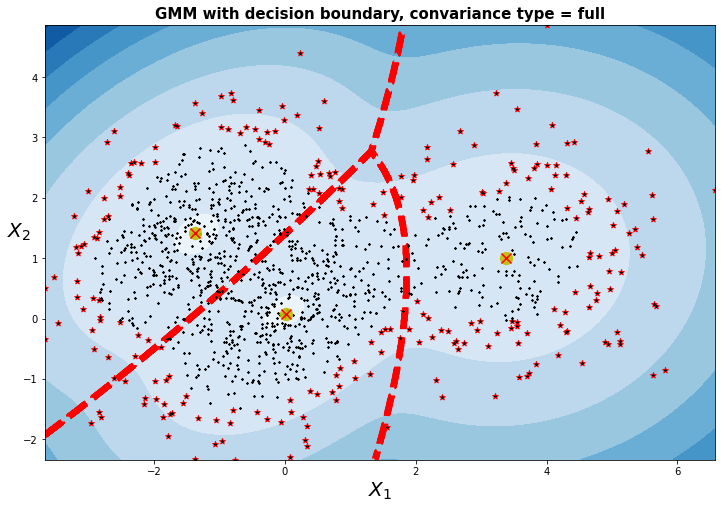

In [30]:
density_threshold_1 = np.percentile(densities, 20)
anomalies_1 = X[densities < density_threshold_1]
plt.figure(figsize=(12, 8))

plot_gaussian_mixture(gm, X)

#plot anomalies 
plt.scatter(anomalies_1[:,0], anomalies_1[:,1], color='r', marker='*')

### Novelty detection is similiar to anomaly detection but the instances are trained on 'clean' data (i.e. without outliers). 

If you train a model on outliers you may observe a high bias error. The best way to clean your data off outliers is to train your GMM initially, remove the outliers using the threshold, then remove these values and <b>retrain</b> your model. If this does not work then you should consider <b>EllipticEnvelope</b>. 

## How to select the right number of clusters in GMM? 
In K means you can use the silhouette score or inertia to find the correct number of clusters. But with GMM we may not observe spherical clusters, so we use a model that <b>minimizes a theorotical information criterion such as the Bayesian Information Criterion (BIC), or the Akaike Information Criterion (AIC)</b>

BIC = log(m)p - 2log($\hat{L}$)

AIC = 2p - 2log($\hat{L}$)

where p is parameters learned, m is number of instances and $\hat{L}$ is the maximized value of the likelihood function of the model. 

Do not confuse the likelihood and probabilities. The likelihood function is a function of the parameters ($\theta$) while the PDF is a function of the instances, $x$, with fixed parameter values,($\theta$). Integrating the PDF gives 1 while integrating the likelihood function can be any positive value.

You need to find the parameters values, ($\theta$), so the best thing to do is to find the values that maximize the likelihood function -i.e. the Maximum Likelihood Estimate (MLE). ($\theta$) can even be an output of a prior density function, ($g(\theta)$). One can simply, commute the maximum of this function to obtain the values of parameter values, this is called <i> maximum a-posteriori (MAP) estimation </i>. In short, <b> this is the regularized version of MLE</b>. 

Since the likelihood function is maximizing two products, using the logarithm of the products would be easier to find the best value of $\theta$, using log rules it is simply log($x\theta$) = log($x$) + log($\theta$). 

Both BIC and AIC increases with more parameters to learn. Although they are similiar, BIC tends to be simplier but not fit the data as well for large datasets compared to AIC. 

In [31]:
gm.bic(X)

8753.629491845306

In [32]:
gm.aic(X)

8666.404211730269

In [33]:
#do this manually by
m = len(X)

n_clusters = 3 #number of clusters
n_dims = 2 #number of dimensions

n_params_for_weights = n_clusters - 1 #number of clusters - 1 = number parameters for weights
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1)//2 #(3 * 2 * (2+1))//2= (18//2)= 9 number of covariance parmas
n_params = n_params_for_covariance + n_params_for_means + n_params_for_weights #totals value of P =17

max_log_likelihood = gm.score(X) * m #Log(L^) - likelyhood per instance multiplied by m

bic = (np.log(m) * n_params) -2*max_log_likelihood
aic = 2*n_params - 2*max_log_likelihood

In [34]:
bic, aic

(8753.629491845306, 8666.404211730269)

#### Note
1 weight class per cluster, so dimensions-1 is the number of params. Think, there are 2 features and 3 clusters. 

The degrees of freedom for the covariance matrix is not $n$ X $n$ like you would expect but is $n(n+1)/2$.


## Lets plot the a graph for our GM model with different values of k.

In [35]:
gm_different_k = [GaussianMixture(n_components=k, random_state=42, n_init=10).fit(X) for k in range(1, 11)]

In [36]:
#find value of BIC and AIC
bics = [model.bic(X) for model in gm_different_k]
aics = [model.aic(X) for model in gm_different_k]

Text(2.5, 8900, ' ')

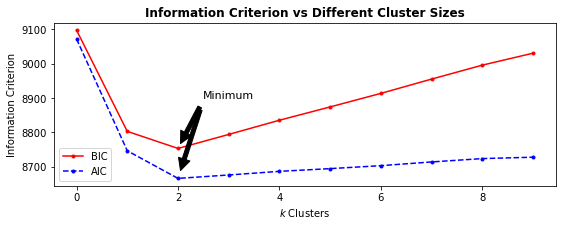

In [37]:
#plot data
plt.figure(figsize= (9, 3))
plt.plot(bics, 'r.-', label='BIC')
plt.plot(aics, 'b.--', label= 'AIC')

#make the graph look pretty
plt.legend()
plt.title('Information Criterion vs Different Cluster Sizes', fontweight= 'bold')
plt.xlabel('$k$ Clusters')
plt.ylabel('Information Criterion')

#annotate it
plt.annotate('Minimum', xy=(2, bics[2]), xytext= (2.5,8900), fontsize= 11,
             arrowprops= dict(facecolor='black', shrink=0.1))
plt.annotate(' ',xy=(2, aics[2]), xytext= (2.5,8900), fontsize= 11,
             arrowprops= dict(facecolor='black', shrink=0.1))

In [38]:
bics

[9097.86342906018,
 8803.27062651907,
 8753.629491845306,
 8794.30508587774,
 8835.678141871416,
 8874.394761411984,
 8913.814146490355,
 8955.41949249812,
 8995.978146978368,
 9030.784643579946]

In [39]:
#you can write a grid search function to find the best number of clusters and the best covariance type
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print(min_bic, best_k, best_covariance_type)

8752.92106550953 3 tied


# Bayesian Gaussian Mixtures (BGM)

Rather than trying to find the right combination of clusters and number of k clusters. Similiar to Lasso Regression, the BGM algorithm is capable of giving weights, for clusters that are uneccessary, zero (or close). You can set n_components to a value that you believe the amount of clusters present but the BGM will element unneccessary clusters automatically. 

In [40]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(random_state=42, n_components=10, n_init=15)
bgm.fit(X)

C:\Users\Ashish\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\mixture\_base.py:263: ConvergenceWarning: Initialization 15 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=15,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [41]:
bgm.converged_

False

oops, the BGM did not converge. Try again with a high initializations and lower the number of components

In [42]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(random_state=42, n_components=4, n_init=10, max_iter=150)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=150, mean_precision_prior=None,
                        mean_prior=None, n_components=4, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [43]:
bgm.converged_

True

In [44]:
np.round(bgm.weights_,2) #Looking at the weights vector you can clearly see that the model automatically detects 3 clusters

array([0.39, 0.4 , 0.21, 0.  ])

Text(0.5, 1.0, 'BGM with Decision Boundaries - 3 clusters correctly identified')

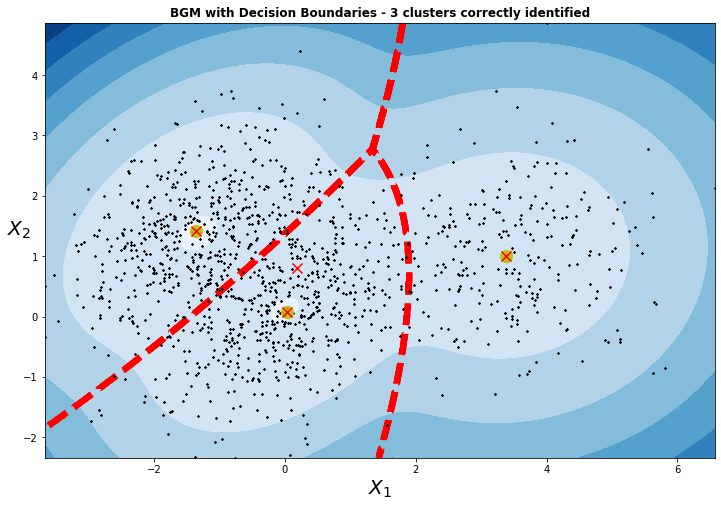

In [45]:
plt.figure(figsize=(12, 8))

plot_gaussian_mixture(bgm, X)
plt.title('BGM with Decision Boundaries - 3 clusters correctly identified', fontweight= 'bold')


If you know the concentration of the clusters, you can set the weight_concentration_prior hyperparameter. A higher value represents higher concentration of data, and lower value represents clusters that are likely to be lower concentration. 
note, the more data we have the less the prior matters. The prior comes from a the probability distribution function, $P(z)$.

In [46]:
bgm_low = BayesianGaussianMixture(random_state=42, n_components=4,
                                  n_init=10, max_iter=150, weight_concentration_prior=0.001)
bgm_low.fit(X[:100])


bgm_high = BayesianGaussianMixture(random_state=42, n_components=4,
                                  n_init=10, max_iter=150, weight_concentration_prior=10000)
bgm_high.fit(X[:100])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=150, mean_precision_prior=None,
                        mean_prior=None, n_components=4, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

<ipython-input-18-d366bb028d9b>:31: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, yy, Z, linewidths=6, colors= 'r', linestyles= 'dashed')


Text(0.5, 1.0, 'BGM prior = 10000')

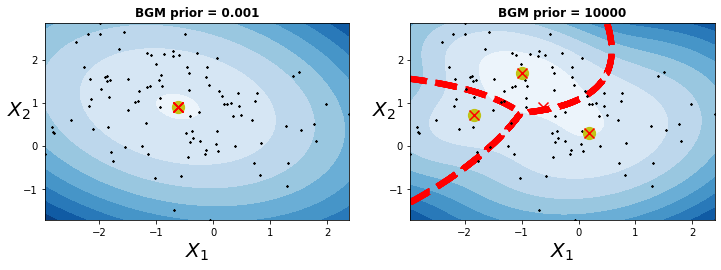

In [47]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plot_gaussian_mixture(bgm_low, X[:100])
plt.title('BGM prior = 0.001', fontweight= 'bold')

plt.subplot(222)
plot_gaussian_mixture(bgm_high, X[:100])
plt.title('BGM prior = 10000', fontweight= 'bold')




Different Concentrations of the prior value will result in different number of reported clusters. Note, that I had to reduce the number of trained values because increasing the data set reduces the affect that prior has. Plotting the same data again with the entire X dataset then there is virtually zero difference between the reported clusters.  

### Bayes Theorem
The Bayes Theorem tells us to update the probability distribution over latent variables after we observe some data X - $P(z|X) = P(X|z)P(z)/P(X)$ = posterior = likelihood x prior /evidence. The evidence, p(X), is difficult to work with as you would have to integrate over all possible combinations of the cluster parameters and assignments. 
You can use the KL divergence equation to find a good approximation of $P(z|X)$, where we aim to maximize the Evidence Lower bound (ELBO) term in the equation. 

There are other techniques to maximise ELBO term, including the mean field variational inference which picks a family of distributions and prior values to simply ELBO to make it computable. But there is no easy way to do this and requires some mathematical skill to select the right family of distributions and prior. 
The Black Box Stochastic Variational Inference (BBSVI) technique can also help maximize the ELBO term, which uses a gradient ascent step, assuming it is differentiable. This approach makes it possible to use Bayesian Interference with any model, including Deep Neural Networks - Bayesian Deep Learning. 

Bayesian works well with ellipsodial cluster shapes and using it with other types of clusters gives bad results! 

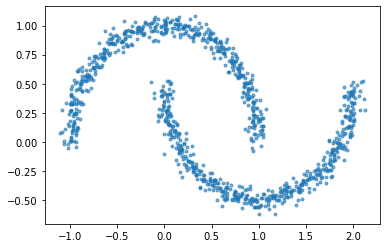

In [48]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(random_state=42, n_samples=1000, noise=0.05)

plt.scatter(X_moons[:,0], X_moons[:,1], marker='.', alpha=0.6)

In [49]:
bgm_moons = BayesianGaussianMixture(random_state=42, n_init=10, n_components=10)
bgm_moons.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

Text(0.5, 1.0, 'BGM on Moons Dataset')

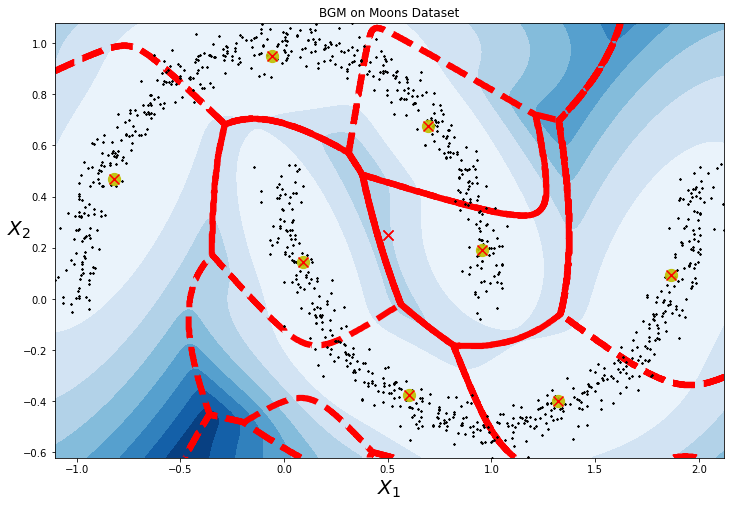

In [50]:
plt.figure(figsize=(12, 8))
plot_gaussian_mixture(bgm_moons, X_moons)
plt.title('BGM on Moons Dataset')

#### Other Anomaly Detection and Novelty Detection Algorithms

- PCA: if you compare the reconstruction error of a normal instance vs an anomaly, the anomaly will be signifcantly larger. 

- Fast Minimum Covariance Determinant (Fast MCD) - use Sklearns's EllipticEnvelope class - this approach assumes that the instances have generated from a single Gaussian distribution (not a mixture) and that it contains outliers that were not Gaussian. It provides an elliptical envolope shape. 

- Isolation Forest - as the name suggests, this algorithm uses a Random Forest - outliers are identified in fewer steps than normal instances, through randomly selecting the threshold value at each node.

- Local Outlier Factor (LOF) - this algorithm computes the density around an instance's neighbourhood. An anomaly is said to be more isolated compared to normal instances. 

- One-Class SVM - better suited for novelty detection and does not scale well with large datasets - the SVM tries to seperate the instances into a higher dimensional space, which then corrosponds to finding a small area within the original space. If an instance does not fall within this area then it is an anomaly. You will need to assign hyperparameter values and select the type of kernal. 